In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("./forestfires.csv")
data.keys()

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [8]:
correlation = data.corr('pearson')

In [9]:
abs(correlation['area']).sort_values()

rain    0.007366
ISI     0.008258
wind    0.012317
FFMC    0.040122
Y       0.044873
DC      0.049383
X       0.063385
DMC     0.072994
RH      0.075519
temp    0.097844
area    1.000000
Name: area, dtype: float64

In [13]:
features =data.drop(['area'], axis=1)
area = pd.DataFrame(data['area'],columns = ['area'])

In [14]:
x =data['temp']
y = data['area']

In [16]:
x = (x-x.min())/(x.max() - x.min())
y = (y - y.min())/(y.max() - y.min())

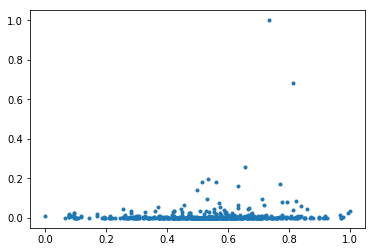

In [17]:
plt.plot(x,y,'.')

In [19]:
x =np.array(x)
y = np.array(y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [21]:
def hypothesis(a, x, b):
    return a * x + b

In [22]:
def error(a,x,b,y):
    e = 0
    m = len(x) #length of data set
    
    for i in range(m):
        e += np.power((hypothesis(a,x[i],b) - y[i]),2)
        
    return (1 /(2* m))*e

In [23]:
def step_gradient(a,x,b,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    
    for i in range(m):
        grad_a+=(1/m)*(hypothesis(a,x[i],b)-y[i])*x[i]
        grad_b+=(1/m)*(hypothesis(a,x[i],b)-y[i])
        
    a = a - grad_a * learning_rate
    b = b - grad_b * learning_rate
    
    return a, b

In [24]:
def descend(init_a, x, init_b, y, learning_rate, iterations):
    a = init_a
    b =init_b
    
    for i in range(iterations):
        e = error(a,x,b,y)
        
        if i %1000 == 0:
            print(f"Error:{np.sqrt(e)}, a:{a},b:{b}")
            
        a,b = step_gradient(a,x,b,y,learning_rate)
        
    return a,b

In [33]:
a = 0.03720598621530359
b = -0.0071784338732754655
learning_rate = 0.1
iterations = 10000

In [34]:
final_a,final_b = descend(a,x_train,b,y_train,learning_rate,iterations)

Error:0.045163339939251014, a:0.03720598621530359,b:-0.0071784338732754655
Error:0.045163339939251014, a:0.03720598621642483,b:-0.0071784338738916705
Error:0.04516333993925103, a:0.037205986216502694,b:-0.007178433873934471
Error:0.04516333993925101, a:0.03720598621650763,b:-0.00717843387393718
Error:0.04516333993925101, a:0.03720598621650763,b:-0.00717843387393718
Error:0.04516333993925101, a:0.03720598621650763,b:-0.00717843387393718
Error:0.04516333993925101, a:0.03720598621650763,b:-0.00717843387393718
Error:0.04516333993925101, a:0.03720598621650763,b:-0.00717843387393718
Error:0.04516333993925101, a:0.03720598621650763,b:-0.00717843387393718
Error:0.04516333993925101, a:0.03720598621650763,b:-0.00717843387393718


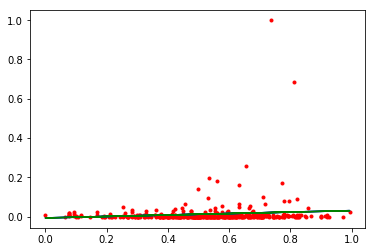

In [35]:
plt.plot(x_train, y_train, 'r.',
        x_train, hypothesis(a,x_train,b),'b',
        x_train, hypothesis(final_a, x_train,final_b),'g')

In [36]:
final_a, final_b

(0.03720598621650763, -0.00717843387393718)

In [37]:
x_test[:3]

array([0.37620579, 0.61414791, 0.35048232])

In [38]:
y_test[:3]

array([0., 0., 0.])

In [39]:
hypothesis(final_a,x_test[:3],final_b)

array([0.00681867, 0.01567154, 0.00586161])

In [40]:
np.sqrt(error(final_a,x_test,final_b,y_test))

0.01652649065088767